<a href="https://colab.research.google.com/github/surekavin/Medical-cost/blob/main/medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape


(1338, 7)

In [5]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
#Displays duplicated rows
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df.drop_duplicates()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.shape


(1338, 7)

In [9]:
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [10]:
df.describe().style.format("{:.2f}")


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


EDA

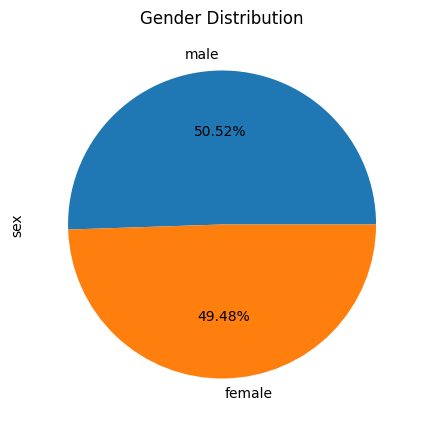

In [11]:
plt.figure(figsize=(5, 5))
df['sex'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show()

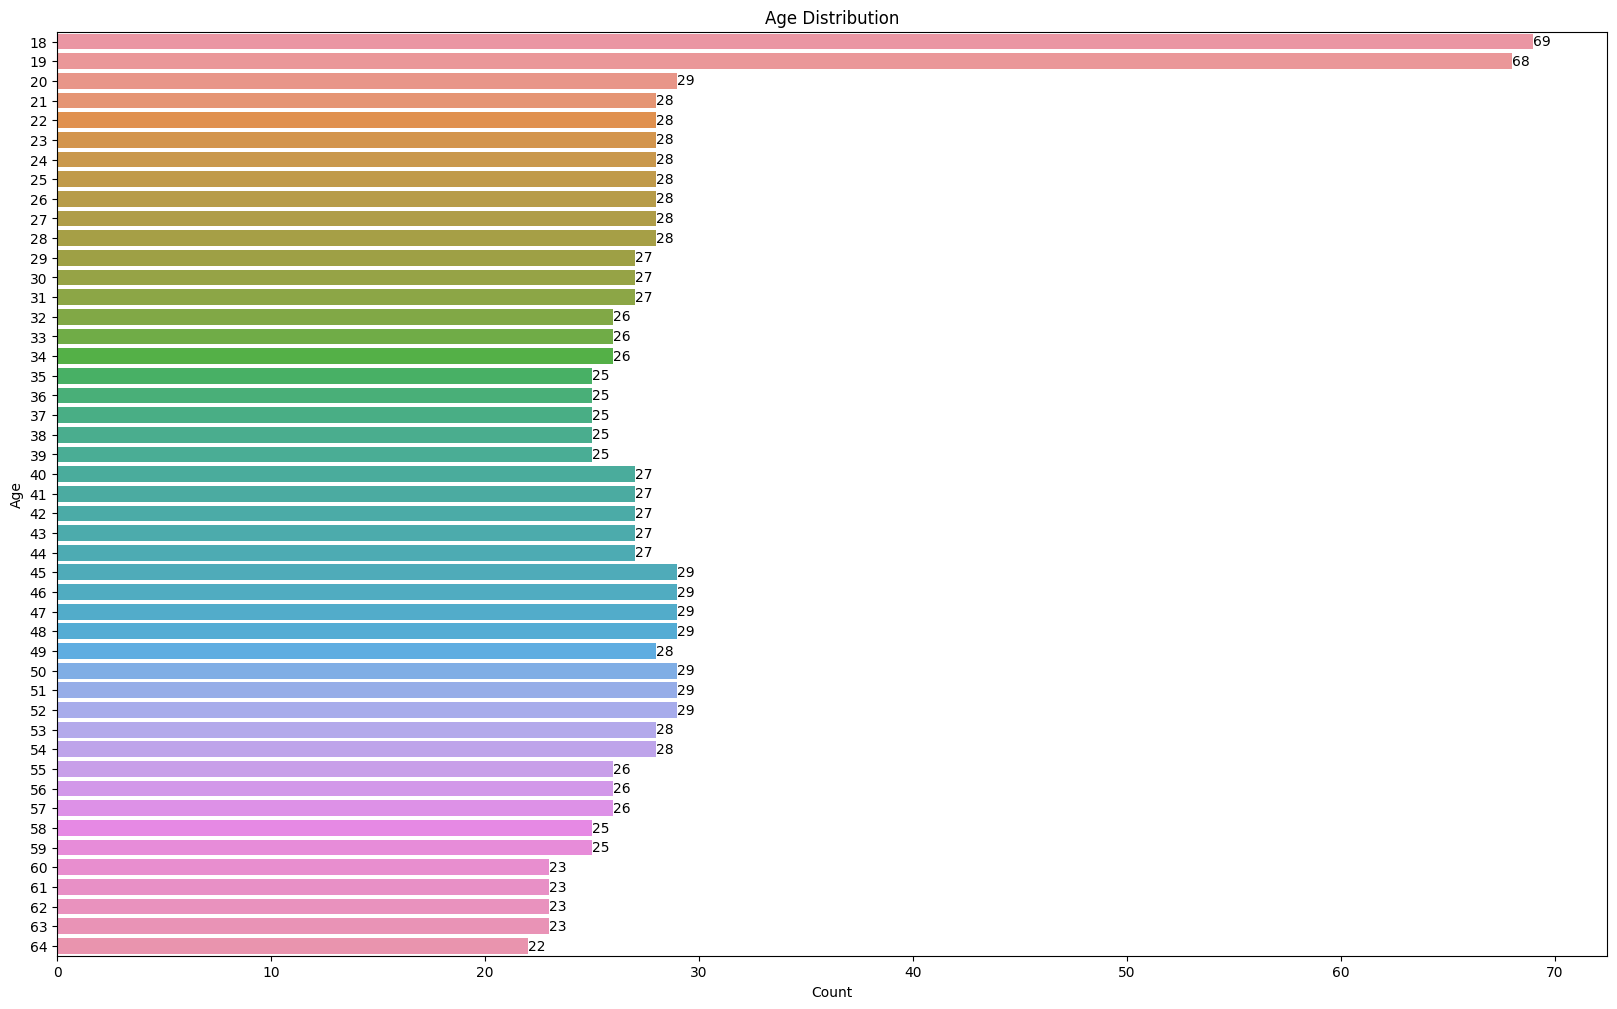

In [12]:
plt.figure(figsize=(20,12))
ax = sns.countplot(data=df, y="age")
plt.xlabel('Count')
plt.ylabel('Age')
ax.bar_label(ax.containers[0])
plt.title('Age Distribution')
plt.show()

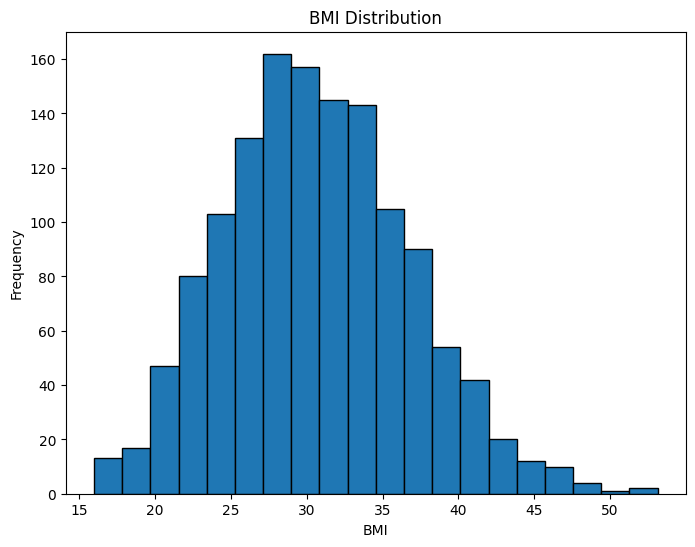

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()


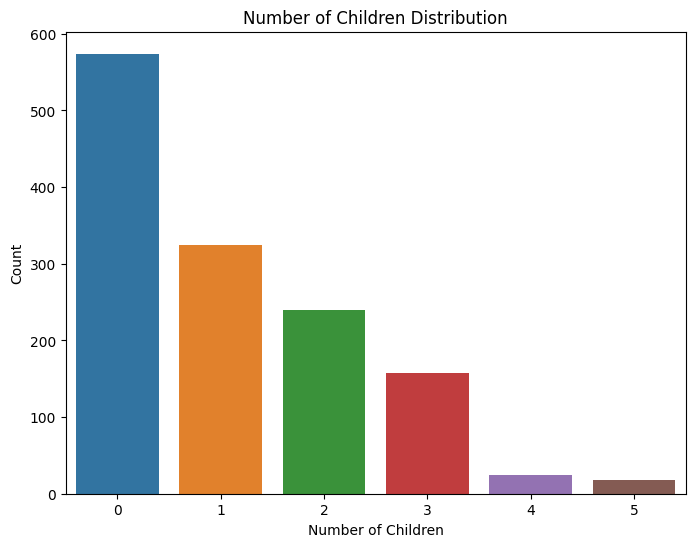

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()


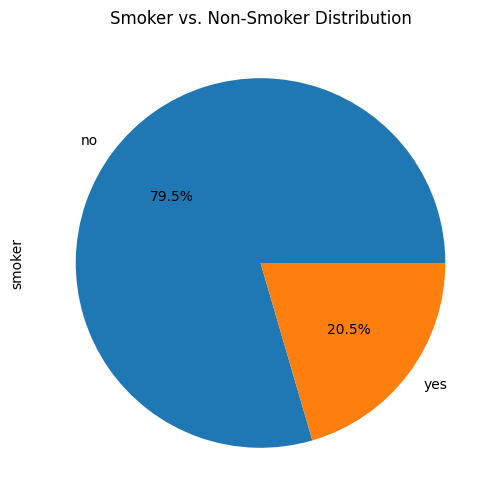

In [15]:
plt.figure(figsize=(8, 6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

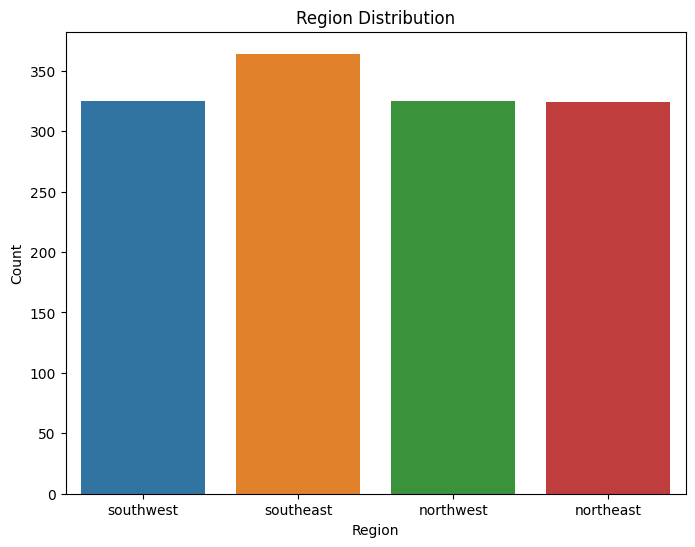

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region Distribution')
plt.show()

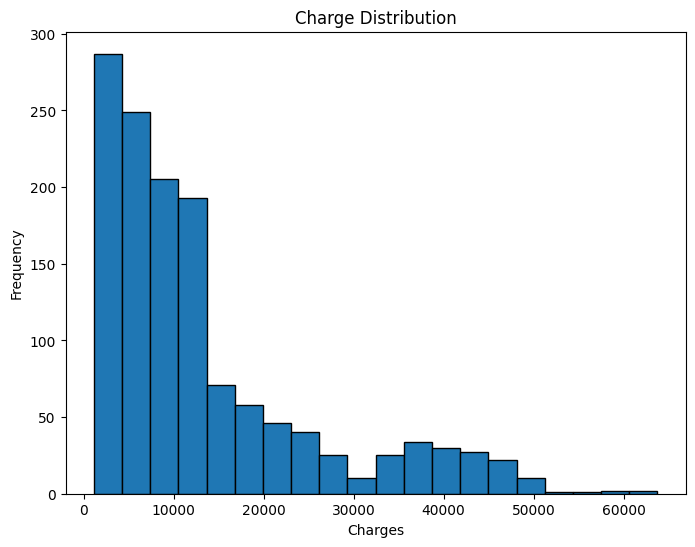

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['charges'], bins=20, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Charge Distribution')
plt.show()

<Axes: title={'center': 'Box plot for charges'}, xlabel='charges', ylabel='smoker'>

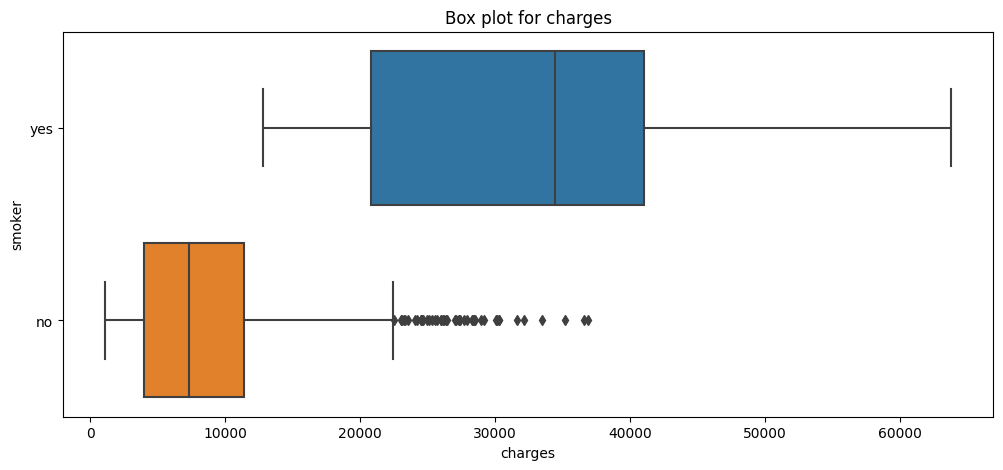

In [18]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges")
sns.boxplot(y="smoker", x="charges", data =  df, orient="h")

Text(0.5, 1.0, 'Scatter plot of age and charges')

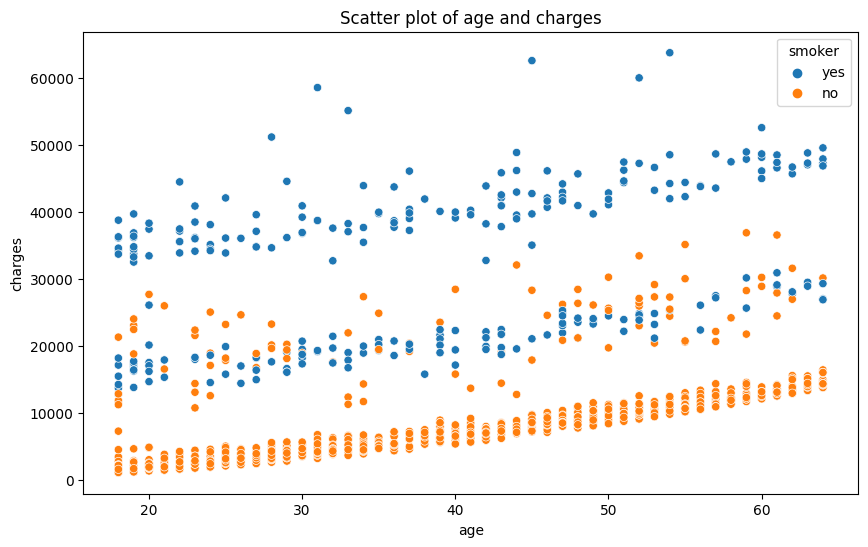

In [19]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='age',y='charges',data=df,hue='smoker')
ax.set_title('Scatter plot of age and charges')

Text(0.5, 1.0, 'Scatter plot of bmi and charges')

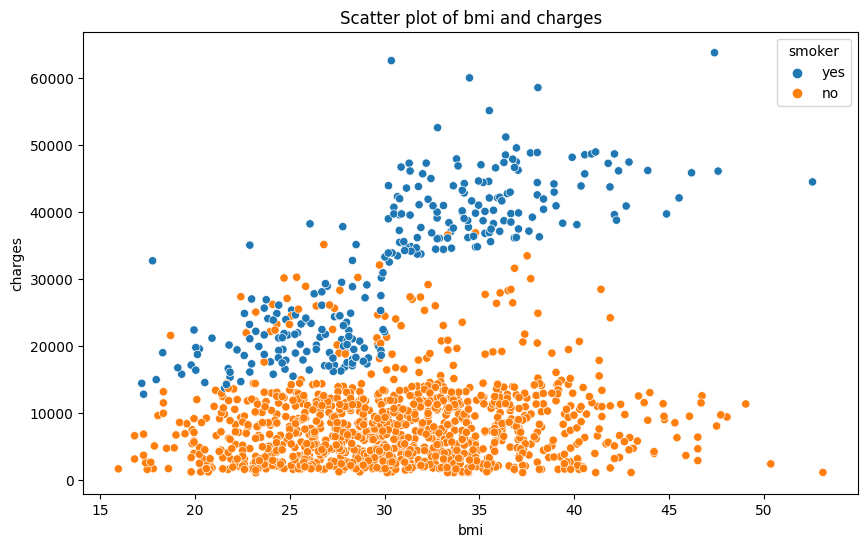

In [20]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker')
ax.set_title('Scatter plot of bmi and charges')

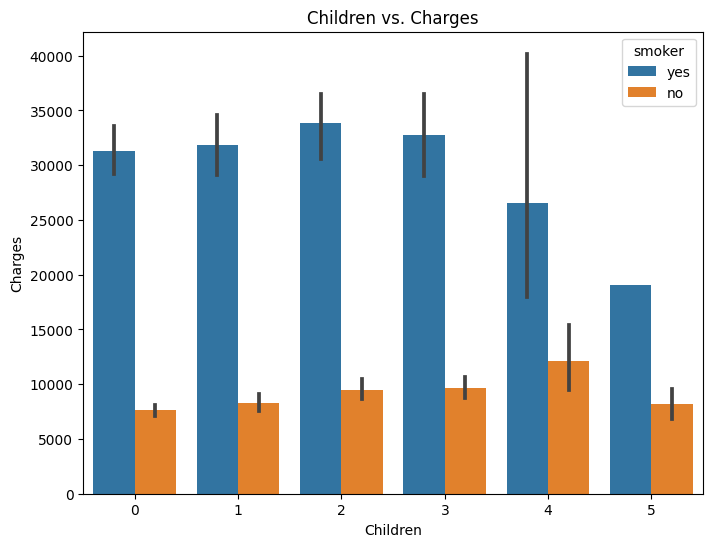

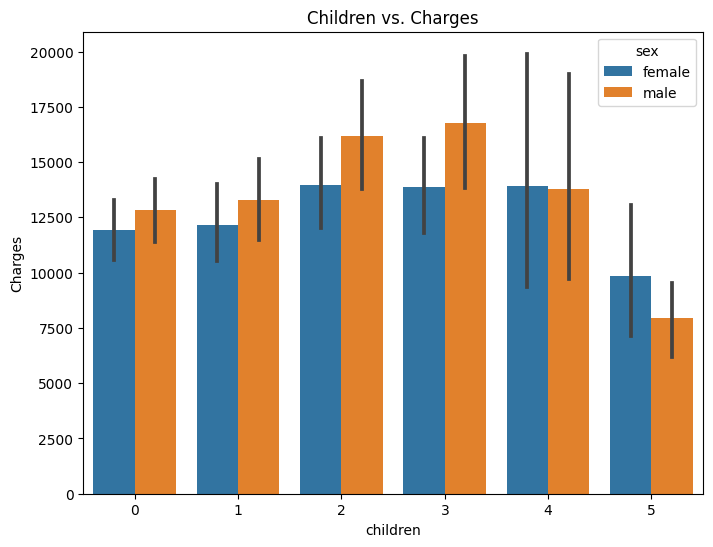

In [21]:
# The black line indicates error mostly standard deviation
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='children', y='charges', hue='smoker')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.title('Children vs. Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='children', y='charges', hue='sex')
plt.xlabel('children')
plt.ylabel('Charges')
plt.title('Children vs. Charges')
plt.show()


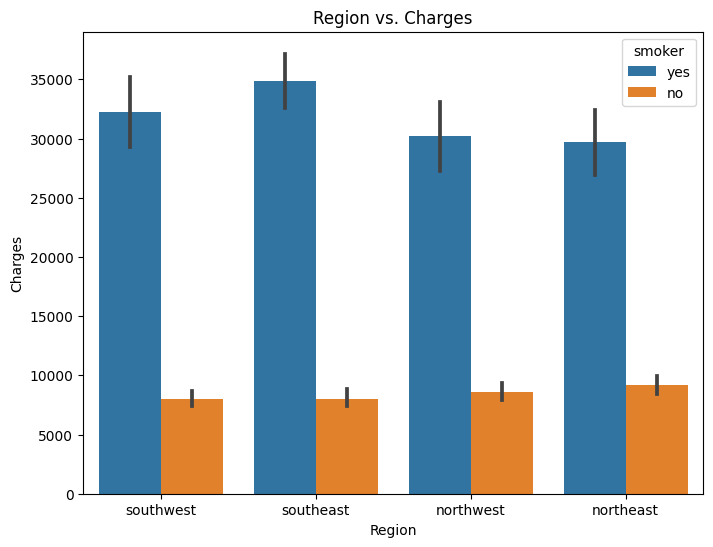

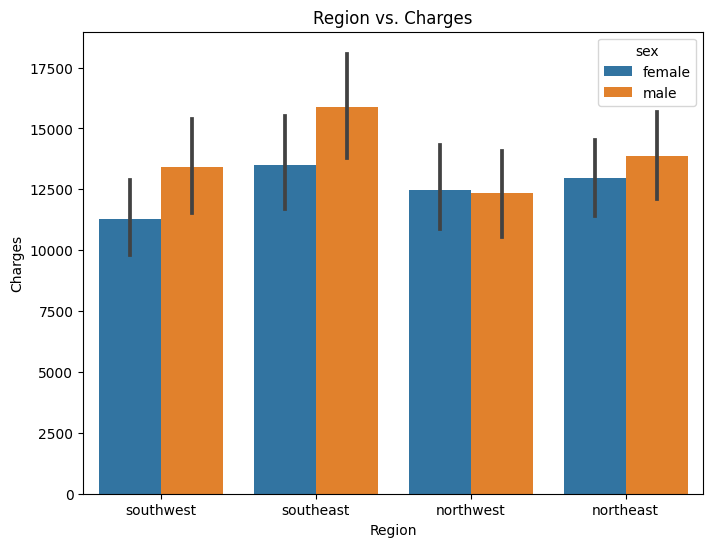

In [22]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges', hue='sex')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

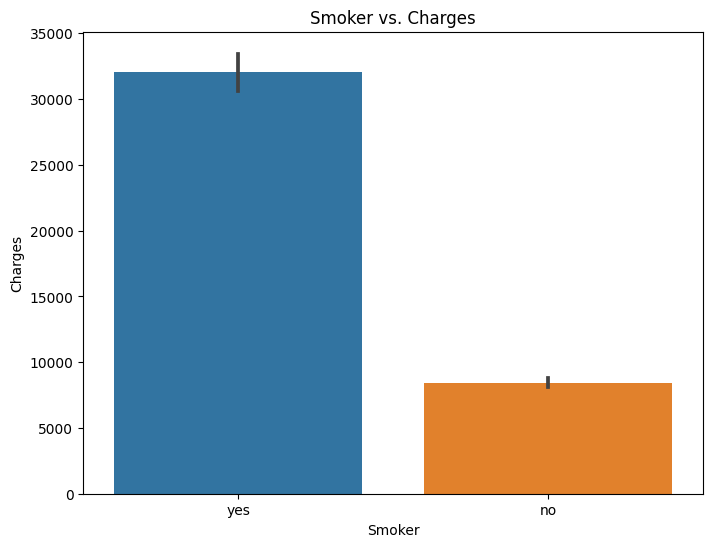

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

In [24]:
# Factorise converts categorical column into numeric form
df['sex'] = pd.factorize(df['sex'])[0] + 1
df['region'] = pd.factorize(df['region'])[0] + 1
df['smoker'] = pd.factorize(df['smoker'])[0] + 1
corr = df.corr()
corr['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.006208
smoker     -0.787251
Name: charges, dtype: float64

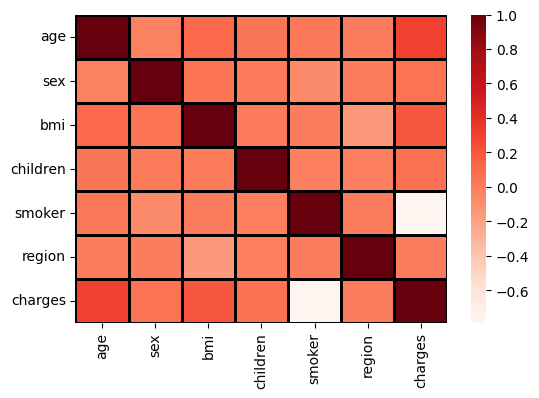

In [25]:
fig = plt.figure(figsize = (6, 4))
data_ploting = df.corr(method= 'pearson')
sns.heatmap(data_ploting, cmap='Reds', linecolor='black', linewidths= 2 )
plt.show()

<Figure size 600x400 with 0 Axes>

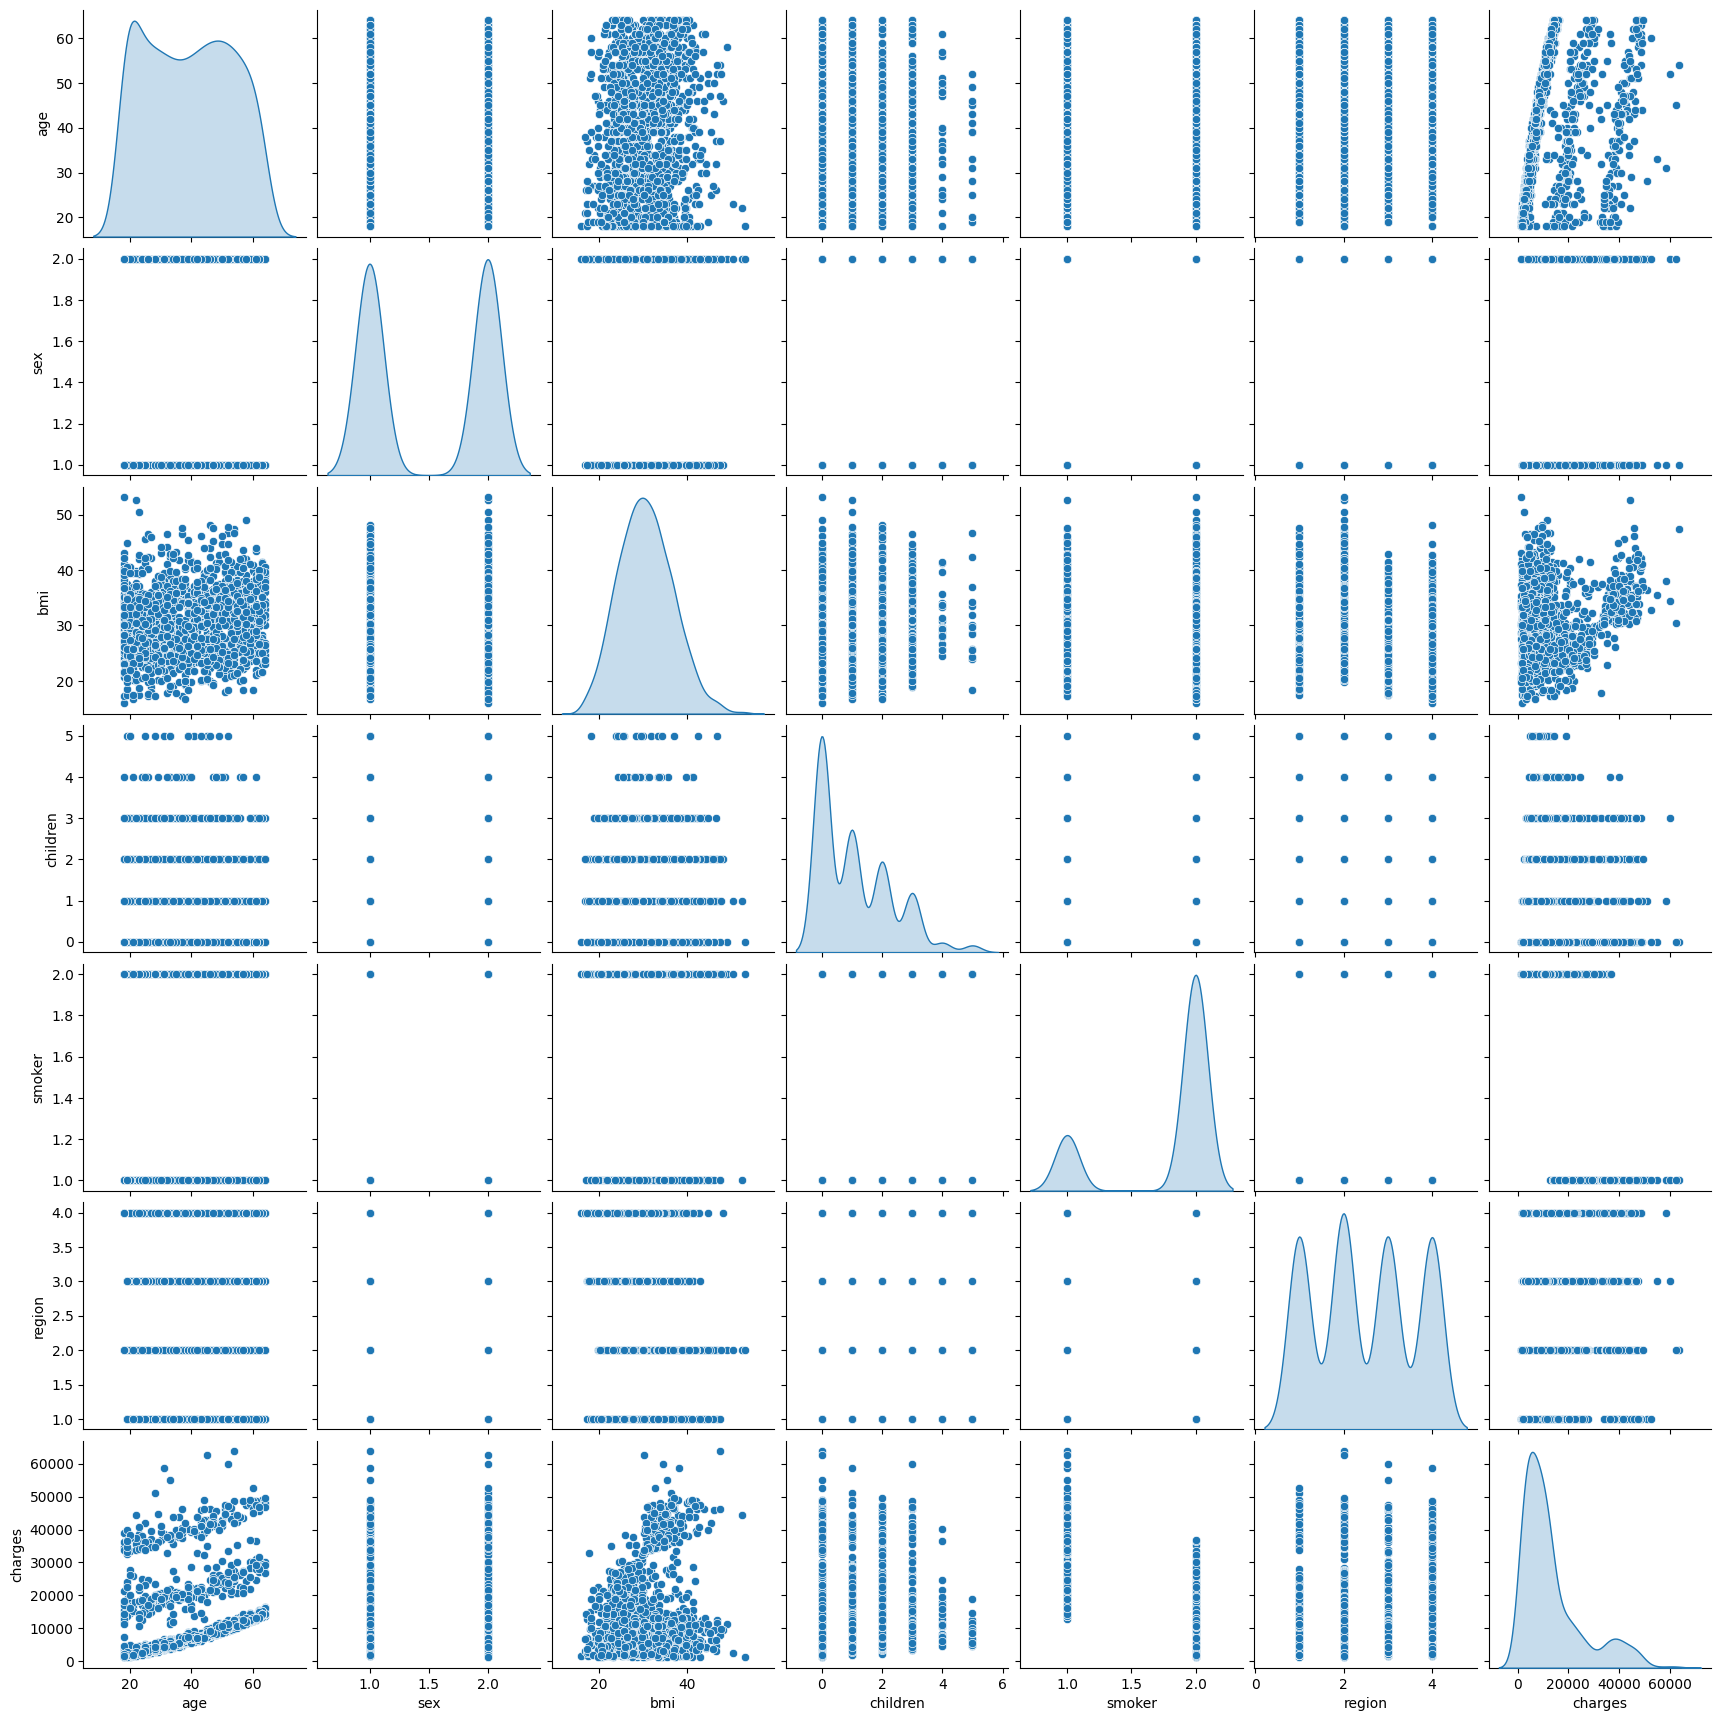

In [26]:
fig = plt.figure(figsize = (6, 4))
sns.pairplot(df,diag_kind='kde');

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score


In [28]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,2,33.770,1,2,2,1725.55230
2,28,2,33.000,3,2,2,4449.46200
3,33,2,22.705,0,2,3,21984.47061
4,32,2,28.880,0,2,3,3866.85520


In [29]:
X = df.drop('charges', axis = 1)
y = df['charges']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
X.head()


,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,2,33.770,1,2,2
2,28,2,33.000,3,2,2
3,33,2,22.705,0,2,3
4,32,2,28.880,0,2,3


In [31]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [32]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [33]:
def scores(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

Linear Regression¶


In [34]:
print(X_train.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [35]:
linear_reg_model= LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
y_pred = linear_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_li_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_li_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_li_reg =np.sqrt(MSE_li_reg)
pd.DataFrame([MAE_li_reg, MSE_li_reg, RMSE_li_reg], index=['MAE_li_reg', 'MSE_li_reg', 'RMSE_li_reg'], columns=['Metrics'])

,Metrics
MAE_li_reg,3.990250e+03
MSE_li_reg,3.353013e+07
RMSE_li_reg,5.790521e+03


In [37]:
scores = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.88791389 0.85653048 0.84404195 0.87198372 0.84417492]


In [38]:
r2_score(y_test, linear_reg_model.predict(X_test_scaled))

0.7613126015198817

Gradient Boosting Regressor

In [39]:
Gradient_model = GradientBoostingRegressor()
Gradient_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [40]:
y_pred = Gradient_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_gradient= metrics.mean_absolute_error(y_test, y_pred)
MSE_gradient = metrics.mean_squared_error(y_test, y_pred)
RMSE_gradient =np.sqrt(MSE_gradient)
pd.DataFrame([MAE_gradient, MSE_gradient, RMSE_gradient], index=['MAE_gradient', 'MSE_gradient', 'RMSE_gradient'], columns=['Metrics'])

,Metrics
MAE_gradient,2.528851e+03
MSE_gradient,2.110725e+07
RMSE_gradient,4.594262e+03


In [41]:
scores = cross_val_score(Gradient_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.9459288  0.91452272 0.91679265 0.92338221 0.91695354]


In [42]:
r2_score(y_test, Gradient_model.predict(X_test_scaled))

0.849746079970233

Decision Tree Regressor

In [43]:
tree_reg_model =DecisionTreeRegressor()
tree_reg_model.fit(X_train_scaled, y_train);

In [44]:
y_pred = tree_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_tree_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_tree_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_tree_reg =np.sqrt(MSE_tree_reg)
pd.DataFrame([MAE_tree_reg, MSE_tree_reg, RMSE_tree_reg], index=['MAE_tree_reg', 'MSE_tree_reg', 'RMSE_tree_reg'], columns=['Metrics'])

,Metrics
MAE_tree_reg,3.546478e+03
MSE_tree_reg,5.063440e+07
RMSE_tree_reg,7.115786e+03


In [45]:
scores = cross_val_score(tree_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.81851522 0.79841672 0.85459187 0.86924469 0.85624154]


In [46]:
r2_score(y_test, tree_reg_model.predict(X_test_scaled))

0.639554218704338

Random Forest Regressor

In [47]:
forest_reg_model =RandomForestRegressor()
forest_reg_model.fit(X_train_scaled, y_train);

In [48]:
y_pred = forest_reg_model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_forest_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_forest_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_forest_reg =np.sqrt(MSE_forest_reg)
pd.DataFrame([MAE_forest_reg, MSE_forest_reg, RMSE_forest_reg], index=['MAE_forest_reg', 'MSE_forest_reg', 'RMSE_forest_reg'], columns=['Metrics'])

,Metrics
MAE_forest_reg,2.856360e+03
MSE_forest_reg,2.483389e+07
RMSE_forest_reg,4.983361e+03


In [49]:
scores = cross_val_score(forest_reg_model, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[0.94045208 0.90366522 0.92119937 0.91443247 0.90326531]


In [50]:
r2_score(y_test, forest_reg_model.predict(X_test_scaled))

0.8232176351559825

XGBoost Regressor


In [51]:
import xgboost as xg

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

xgb_r.fit(X_train_scaled, y_train)

[01:26:16] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [52]:
y_pred = xgb_r.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
MAE_xgb_reg= metrics.mean_absolute_error(y_test, y_pred)
MSE_xgb_reg = metrics.mean_squared_error(y_test, y_pred)
RMSE_xgb_reg =np.sqrt(MSE_xgb_reg)
pd.DataFrame([MAE_xgb_reg, MSE_xgb_reg, RMSE_xgb_reg], index=['MAE_xgb_reg', 'MSE_xgb_reg', 'RMSE_xgb_reg'], columns=['Metrics'])

,Metrics
MAE_xgb_reg,2.616282e+03
MSE_xgb_reg,2.339652e+07
RMSE_xgb_reg,4.836995e+03


In [53]:
scores = cross_val_score(xgb_r, X_train_scaled, y_train, cv=5)
print(np.sqrt(scores))

[01:26:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[01:26:51] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0.94539616 0.90904152 0.91344904 0.92298566 0.9107528 ]


In [54]:
r2_score(y_test, xgb_r.predict(X_test_scaled))

0.8334496647978905

Among all tested models Gradient Boosting Regressor outperformed all other models with R squared value of 84.97